# Variables

## Variables qu'on ne regarde pas

long_persist: t'occupes en pas.
long: première année ou on trouve de la prédictabilité après le time of emergence ou après 30 ans si pas de toe mais t'occupes en pas non plus.

is.long_p: balec
time: c'est toujours 1 c'est du a la façon dont j'agrège les données dans R on s'en tape.
is.smooth: c'est 0 = j'utilise mes time series brute et 1 = j'utilise des valeurs smoothées avec une moyenne mouvante (je sais pas comment ca s'appelle mdr) sur 10 ans mais pas centré, je prends les 10 ans avant (ou moins pour les années avant 10 ans).

## Variables de bruit

In [ ]:
# Ici c'est des variables de bruit donc ce que t'as toi en colonne c'est des niveaux de bruit mais moi ce que j'ai fait c'est que pour chaque niveau
# d'incertitude je crée 100 valeurs qui vont être pioché aléatoirement dans [variable-bruit, variable+bruit]
# par exemple si j'ai une sensi de -0.05 et une observation error de 0.01 je vais chopper 100 fois une valeur dans [-0.05-0.01, -0.05+0.01]
# et ca deviendra mes 100 valeurs de sensi pour mes 100 simulations à partir desquelles je calcule l'ACC tout ca.

is.initial.uncer: c'est le niveau d'incertitude initiale. La façon dont j'ajoute l'incertitude initiale c'est qu'en fait de base pour calculer mon taux de croissance je dois multiplier ma matrice de pop par la distribution d'age dans ma pop, c'est à dire la proportion adulte/juvénile. De base je connais mes valeurs stables c'est à dire les valeurs pour lequel mon taux de croissance sera de 1. Pour rajouter l'incertitude initiale j'ajoute juste plus ou moins de bruit autour de ces valeurs stables à l'année 1 (ce que représente cette variable). Après la distribution d'age va se stabiliser d'elle même au bout de quelques années dans le modèle. 

is.process.error: le niveau de bruit blanc dans mon calcul de taux de croissance. C'est vraiment du bête bruit.

is.observation.error: c'est mon erreur d'observation en gros je pars du principe qu'on mesure pas parfaitement la variable "sensi" et j'ajoute plus ou moins de bruit autour. L'effet principal que ça va avoir c'est que ça va augmenter l'incertitude autour de la pente.

## Variables de prédiction

horizon: la première année sous le seuil de prédictabilité (quand c'est 1 ca veut dire qu'on a mal prédi des le premier step, quand c'est 10 on a prédi sur toute la période qu'on regarde. 

ToE: l'année à laquelle la distribution sort de la variabilité naturelle (time of emergence)

noise: le niveau de bruit donc de variabilité autour de la moyenne dans ta time series environnementale. y a 6 valeurs croissantes de bruit. 

signal: le niveau de forcing donc la pente que tu ajoutes à partir d'un certain temps dans ta time series environment pour simuler genre le changement climatique. De mémoire il doit y avoir 5 niveaux de signal. 

species: 4 niveaux en gros ça correspond à des cycles de vie: très court, court, long, très long. 

vr: c'est ton vital rate donc en gros c'est l'aspect de ton cycle de vie qui va être affecté par l'environnement. Dans mes modèles il y a toujours un seul vital rate qui dépend de l'environnement à la fois. C'est pas réaliste puisqu'évidemment dans la vrai vie ils sont surement tous affectés mais ça permet de voir les effets relatifs sur chaque trait. Tu as donc 4 niveaux qui correspondent dans l'ordre à: fertilité, survie juvénile, survie adulte et maturation rate (le rate auquel tu passe du stage juvénile au stade adulte) et c'est avec ces quatre variables que je reconstruit ma matrice de population de laquelle j'extrais le taux de croissance de ma pop à chaque année. 

is.mean.uncer: c'est la façon dont je calcule la relation entre environnement et pop mais en gros ça va beaucoup changer donc je serais toi je garderais juste les is.mean.uncer = 1 et je virerais carrément le reste. 

sensi: c'est la sensibilité de ta pop (donc du vital rate puisque c'est un seul à la fois dans notre cas) à l'environnement. Ca peut prendre 3 valeurs: une positive donc la population kiffe le changement, une négative et une négative forte.

is.horizon: c'est juste est-ce que t'as reussi à prédire un peu le short term. Clairement c'est juste est-ce que ta variable horizon elle est supérieur à 1 oui/non

is.long: pareil mais pour la variable long.


is.ToE: est-ce que tu détectes un time of emergence ou pas. En gros est-ce que ton ToE est NaN ou pas. 

# Visualisation des données

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('tab.csv')
df = df.drop(columns=['long','long_persist','time'])
df.head() # to display the first 5 lines of loaded data

In [ ]:
def plot_histograms(df):
    # Définir le nombre de colonnes à afficher
    n_cols = len(df.columns)
    
    # Définir le nombre de lignes nécessaires (on arrondit pour avoir un nombre entier de lignes)
    n_rows = (n_cols + 1) // 2
    
    # Créer la figure avec n_rows lignes et 2 colonnes (si possible)
    fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(10, 5 * n_rows))
    
    # Aplatir les axes pour les manipuler plus facilement
    axes = axes.flatten()
    
    for i, col in enumerate(df.columns):
        # Vérifier si la colonne contient des données qualitatives ou quantitatives
        if df[col].dtype == 'O' or df[col].nunique() <= 10:
            # Si c'est une variable qualitative ou une variable discrète avec peu de valeurs uniques
            sns.countplot(data=df, x=col, ax=axes[i])
            axes[i].set_title(f"Histogramme de {col} (Qualitatif)")
        else:
            # Sinon, c'est une variable quantitative continue
            sns.histplot(df[col], kde=False, ax=axes[i], bins=10)
            axes[i].set_title(f"Histogramme de {col} (Quantitatif)")
    
    # Supprimer les axes vides (si nécessaire)
    for i in range(n_cols, len(axes)):
        fig.delaxes(axes[i])
    
    # Ajuster la disposition
    plt.tight_layout()
    plt.show()

In [ ]:
plot_histograms(df)

# Traitement des données

In [1]:
from functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tab.csv')
df = df.drop(columns=['long','time'])
df.head() # to display the first 5 lines of loaded data

,horizon,ToE,long_persist,noise,signal,species,vr,sensi,initial.uncer,process.error,obs.error,is.horizon,is.long,is.ToE
0,1,34.0,NaN,0.10,0.01,1,1,Positive,0.025,0.005,0.01,0,0,1
1,1,NaN,NaN,0.20,0.01,1,1,Positive,0.025,0.005,0.01,0,0,0
2,1,NaN,NaN,0.30,0.01,1,1,Positive,0.025,0.005,0.01,0,0,0
3,1,57.0,NaN,0.50,0.01,1,1,Positive,0.025,0.005,0.01,0,0,1
4,1,47.0,NaN,0.75,0.01,1,1,Positive,0.025,0.005,0.01,0,0,1


long_persist: t'occupes en pas.
long: première année ou on trouve de la prédictabilité après le time of emergence ou après 30 ans si pas de toe mais t'occupes en pas non plus.

is.long_p: balec
time: c'est toujours 1 c'est du a la façon dont j'agrège les données dans R on s'en tape.
is.smooth: c'est 0 = j'utilise mes time series brute et 1 = j'utilise des valeurs smoothées avec une moyenne mouvante (je sais pas comment ca s'appelle mdr) sur 10 ans mais pas centré, je prends les 10 ans avant (ou moins pour les années avant 10 ans).

In [3]:
df2 = df
df2['ToE'] = df['ToE'].fillna(0)
df2['long_persist'] = df2['long_persist'].fillna(0)

In [16]:
df2.shape

(345600, 14)

In [4]:
df2['sensi'] = df2['sensi'].replace({'Positive': 1, 'Negative': -1, 'Negative+': -1})

C:\Users\bbeltzun\AppData\Local\Temp\ipykernel_14888\520741727.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['sensi'] = df2['sensi'].replace({'Positive': 1, 'Negative': -1, 'Negative+': -1})


In [18]:
df2.shape

(345600, 14)

In [20]:
df2.shape

(345600, 14)

# Modèles

## Arbre décision

In [5]:
import graphviz
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from bayes_opt import BayesianOptimization

### Application sur les variables cibles (is.horizon, is.ToE, is.long)

#### is.horizon

In [6]:
# var_x = ['horizon','ToE','long_persist','noise','signal','species','vr','sensi','initial.uncer','process.error','obs.error']
var_x = ['noise','signal','species','vr','sensi','initial.uncer','process.error','obs.error']
param_bounds = {
    'max_depth': (1, 3),
    'min_samples_split': (2, 100),
    'min_samples_leaf': (1, 100)
}

result = main(df2, var_x, 'is.horizon', param_bounds)

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.9909    | 1.834     | 72.31     | 2.011     |
| 2         | 0.9909    | 1.605     | 15.53     | 11.05     |
| 3         | 0.9909    | 1.373     | 35.21     | 40.88     |
| 4         | 0.9909    | 2.078     | 42.5      | 69.15     |
| 5         | 0.9909    | 1.409     | 87.93     | 4.684     |
| 6         | 0.9909    | 2.13      | 97.92     | 99.74     |
| 7         | 0.9909    | 2.678     | 1.674     | 99.2      |
| 8         | 0.9909    | 2.631     | 99.23     | 99.97     |
| 9         | 0.9909    | 2.511     | 1.409     | 2.331     |
| 10        | 0.9909    | 2.453     | 73.13     | 21.08     |
| 11        | 0.9909    | 1.94      | 42.93     | 48.25     |
| 12        | 0.9909    | 2.911     | 66.74     | 48.13     |
| 13        | 0.9909    | 1.977     | 84.28     | 97.95     |
| 14        | 0.9909    | 1.645     | 76.59     | 85.98     |
| 15    

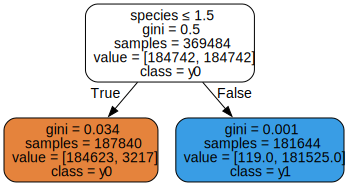

In [7]:
graphviz.Source(result['graph'])

<Axes: ylabel='None'>

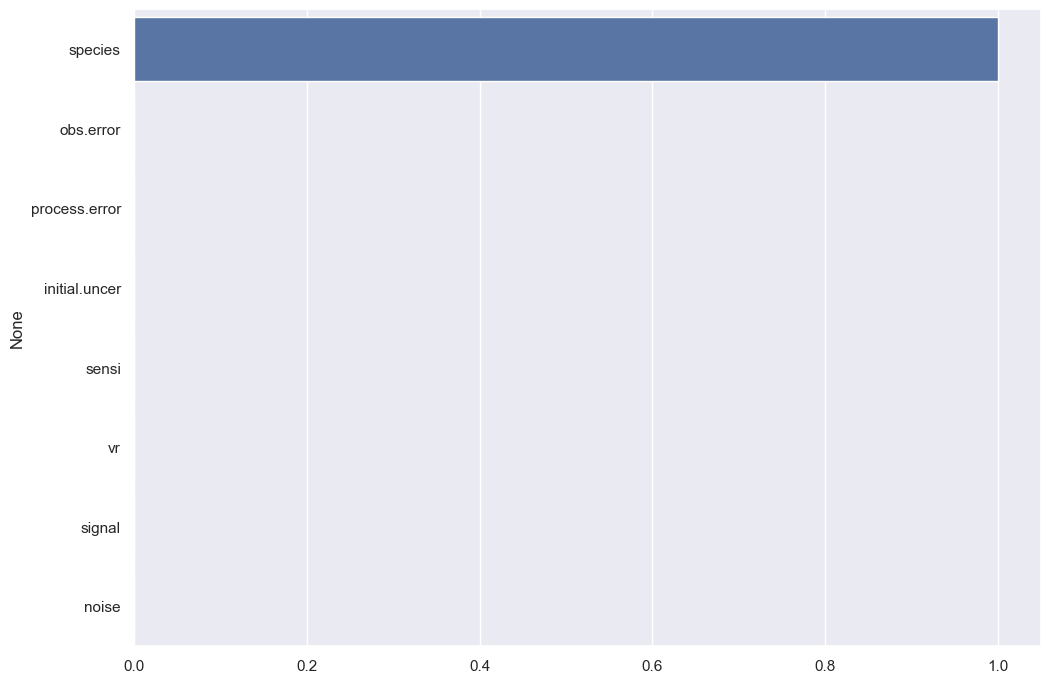

In [8]:
# Print the feature importances
feature_importances = result['final_model'].feature_importances_

import seaborn as sns

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = result['X_train'].columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)

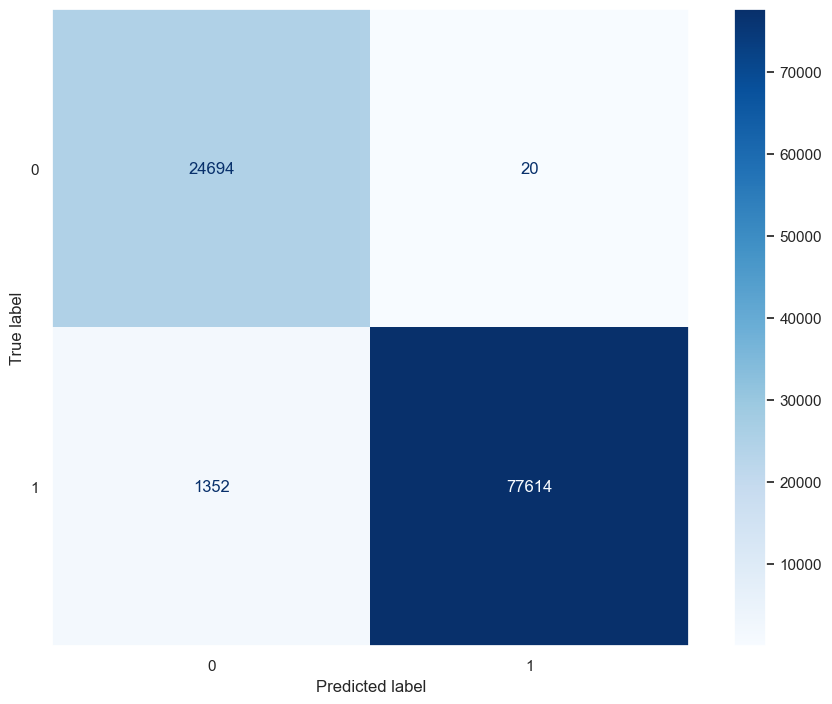

In [9]:
plot_conf_mat(result['y_test'],result['y_pred'])#,normalize='true')

In [10]:
print(f1_score(result['y_test'], result['y_pred'], average=None))

[0.97297084 0.99123883]


#### is.ToE

In [ ]:
# var_x = ['horizon','ToE','noise','signal','species','vr','sensi','initial.uncer','process.error','obs.error']
var_x = ['horizon','noise','signal','species','vr','sensi','initial.uncer','process.error','obs.error']
param_bounds = {
    'max_depth': (1, 4),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

result = main(df2, var_x, 'is.ToE', param_bounds)

In [ ]:
graphviz.Source(result['graph'])

In [ ]:
# Print the feature importances
feature_importances = result['final_model'].feature_importances_

import seaborn as sns

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = result['X_train'].columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)

In [ ]:
plot_conf_mat(result['y_test'],result['y_pred'])#,normalize='true')

In [ ]:
print(f1_score(result['y_test'], result['y_pred'], average=None))

#### is.long

In [21]:
df2['is.long'].value_counts()

is.long
0    244561
1    101039
Name: count, dtype: int64

In [27]:
# var_x = ['horizon','ToE','noise','signal','species','vr','sensi','initial.uncer','process.error','obs.error']
var_x = ['noise','signal','species','vr','sensi','initial.uncer','process.error','obs.error']
param_bounds = {
    'max_depth': (1, 10),
    'min_samples_split': (2, 200),
    'min_samples_leaf': (1, 200)
}

result = main(df2, var_x, 'is.long', param_bounds)

C:\Users\Bnjmn\.conda\envs\tf_GPU\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.8766    | 4.753     | 144.3     | 2.023     |
| 2         | 0.846     | 3.721     | 30.2      | 20.28     |
| 3         | 0.846     | 2.676     | 69.77     | 80.56     |
| 4         | 0.8934    | 5.849     | 84.42     | 137.7     |
| 5         | 0.846     | 2.84      | 175.7     | 7.423     |
| 6         | 0.8934    | 5.559     | 83.3      | 138.8     |
| 7         | 0.846     | 3.691     | 108.8     | 159.0     |
| 8         | 0.9066    | 6.138     | 71.98     | 126.8     |
| 9         | 0.9066    | 6.297     | 47.65     | 137.6     |
| 10        | 0.913     | 9.958     | 8.059     | 155.2     |
| 11        | 0.9066    | 6.781     | 11.61     | 195.3     |
| 12        | 0.846     | 3.844     | 1.245     | 117.4     |
| 13        | 0.9128    | 9.49      | 32.78     | 171.2     |
| 14        | 0.9079    | 8.616     | 197.0     | 199.2     |
| 15    

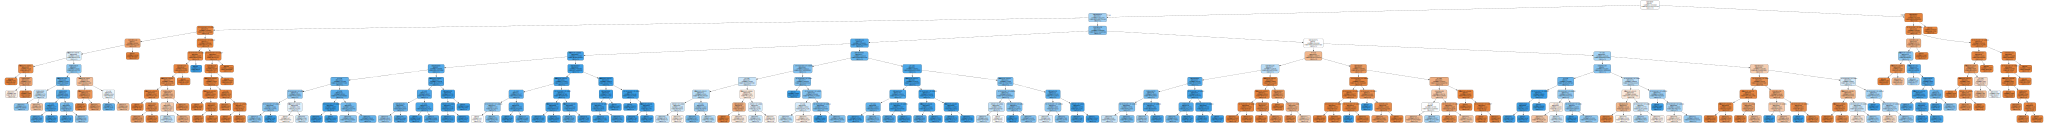

In [28]:
graphviz.Source(result['graph'])

<Axes: ylabel='None'>

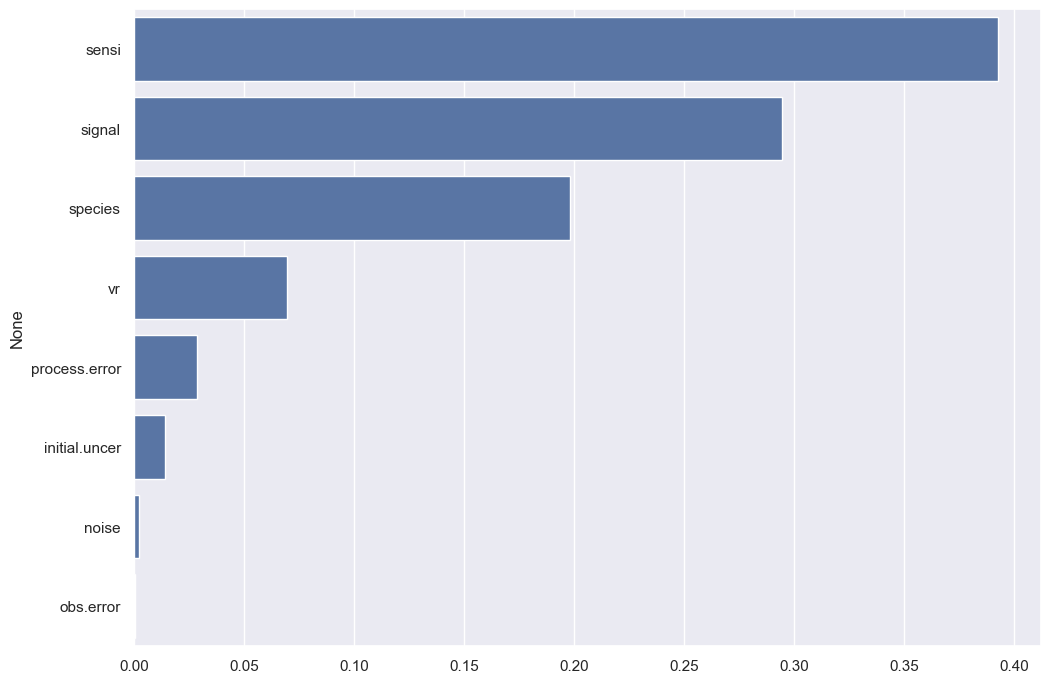

In [29]:
# Print the feature importances
feature_importances = result['final_model'].feature_importances_

import seaborn as sns

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = result['X_train'].columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=sorted_importances, y=sorted_feature_names)

In [ ]:
plot_conf_mat(result['y_test'],result['y_pred'],normalize='true')

## Régression logistique

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Normaliser les données (ToE, horizon, et vr ?)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df2[['ToE_standard','horizon_standard']] = scaler.fit_transform(df2[['ToE', 'horizon']])
df2 = df2.drop(columns=['ToE','horizon'])

In [ ]:
def log_reg(X_labels,y_label):
    X, y = df2[X_labels], df2[y_label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    # Importance des coefficients
    coefficients = pd.DataFrame({
        'Variable': X.columns,
        'Coefficient': model.coef_[0],
        'Odds Ratio': np.exp(model.coef_[0])
    })
    print(coefficients.sort_values(by='Coefficient', ascending=False))

In [ ]:
log_reg(['horizon_standard', 'ToE_standard', 'species','vr','sensi'],'is.horizon')

In [ ]:
log_reg(['horizon_standard', 'ToE_standard', 'species','vr','sensi'],'is.long')

In [ ]:
log_reg(['horizon_standard', 'ToE_standard', 'species','vr','sensi'],'is.ToE')

In [ ]:
log_reg(['horizon_standard', 'ToE_standard', 'species','vr','sensi'],'is.ToE')

In [ ]:
log_reg(['horizon_standard', 'species','vr','sensi','is.horizon','is.long'],'is.ToE')

In [ ]:
observation_index = 1
# Cas où expected_value est un scalaire
shap.waterfall_plot(shap.Explanation(values=shap_values[observation_index], 
                                     base_values=explainer.expected_value,
                                     data=X_test[observation_index]))


In [ ]:
import shap

X, y = df2[['horizon_standard', 'ToE_standard', 'species','vr','sensi']], df2['is.ToE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

explainer = shap.Explainer(model, X_train)

In [ ]:
shap_values = explainer(X_test)

In [ ]:
shap.dependence_plot(0, shap_values.values, X_test)

## Réseau de neurones

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.utils.class_weight import compute_class_weight

X, y = df2[['horizon_standard', 'ToE_standard', 'species','vr','sensi']], df2['is.ToE']

X, y = df2[['horizon_standard']], df2['is.ToE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

model = Sequential()
model.add(Dense(32, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=5, batch_size=32, class_weight=class_weights)